# 순환 신경망 - 나비야

In [6]:
# 사용할 패키지 불러오기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [7]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [8]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [9]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
dataset = seq2dataset(seq, window_size = 4)

dataset.shape

(50, 5)

In [10]:
dataset[:5]

array([[11,  9,  2, 10,  8],
       [ 9,  2, 10,  8,  1],
       [ 2, 10,  8,  1,  7],
       [10,  8,  1,  7,  8],
       [ 8,  1,  7,  8,  9]])

In [11]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [13]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [14]:

# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [15]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [16]:
# 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2)

Epoch 1/2000
5/5 - 1s - loss: 2.4496 - accuracy: 0.1400
Epoch 2/2000
5/5 - 0s - loss: 2.3157 - accuracy: 0.3000
Epoch 3/2000
5/5 - 0s - loss: 2.2124 - accuracy: 0.3200
Epoch 4/2000
5/5 - 0s - loss: 2.1218 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.0479 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 1.9854 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 1.9428 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 1.9215 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 1.9039 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 1.8801 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.8653 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.8466 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.8285 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.8136 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.8030 - accuracy: 0.3400
Epoch 16/2000
5/5 - 0s - loss: 1.7894 - accuracy: 0.3400
Epoch 17/2000
5/5 - 0s - loss: 1.7722 - accuracy: 0.3400
Epoch 18/2000
5/5 - 0s - loss: 1.7646 - 

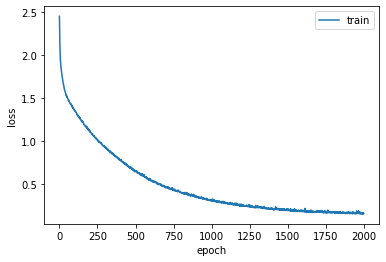

In [20]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [21]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 6ms/step - loss: 0.1465 - accuracy: 0.9200
accuracy: 92.00%


In [22]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [23]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [25]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']
